# Mushroom Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
# Pipeline
from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('data/primary_data.csv', delimiter=';')
df

family               name class cap-diameter  cap-shape  \
0        Amanita Family         Fly Agaric     p     [10, 20]     [x, f]   
1        Amanita Family        Panther Cap     p      [5, 10]     [p, x]   
2        Amanita Family  False Panther Cap     p     [10, 15]     [x, f]   
3        Amanita Family        The Blusher     e      [5, 15]     [x, f]   
4        Amanita Family          Death Cap     p      [5, 12]     [x, f]   
..                  ...                ...   ...          ...        ...   
168   Saddle-Cup Family       White Saddle     p       [2, 6]        [o]   
169       Bracket Fungi     Elfin's Saddle     p       [2, 4]        [o]   
170       Bracket Fungi      Turban Fungus     p      [5, 15]        [o]   
171        Morel Family       Common Morel     e       [3, 8]  [p, c, o]   
172  Jelly Discs Family       Jelly Babies     p     [1, 1.5]  [x, f, s]   

    Cap-surface cap-color does-bruise-or-bleed gill-attachment gill-spacing  \
0        [g, h]    [e, o]                  [f]             [e]          NaN   
1           [g]       [n]                  [f]             [e]          NaN   
2           NaN    [g, n]                  [f]             [e]          NaN   
3           NaN       [n]                  [t]             NaN          NaN   
4           [h]       [r]                  [f]             NaN          [c]   
..          ...       ...                  ...             ...          ...   
168         NaN       [w]                  [f]             [f]          [f]   
169         NaN    [g, k]                  [f]             [f]          [f]   
170         NaN    [n, e]                  [f]             [f]          [f]   
171         NaN    [n, g]                  [f]             [f]          [f]   
172         [s]       [y]                  [f]             [f]          [f]   

     ... stem-root stem-surface stem-color veil-type veil-color has-ring  \
0    ...       [s]          [y]        [w]       [u]        [w]      [t]   
1    ...       NaN          [y]        [w]       [u]        [w]      [t]   
2    ...       NaN          NaN        [w]       [u]        [w]      [t]   
3    ...       [b]          NaN        [w]       [u]        [w]      [t]   
4    ...       NaN          NaN        [w]       [u]        [w]      [t]   
..   ...       ...          ...        ...       ...        ...      ...   
168  ...       NaN          [g]        [w]       NaN        NaN      [t]   
169  ...       NaN          [g]     [g, n]       NaN        NaN      [f]   
170  ...       NaN          [g]        [n]       NaN        NaN      [f]   
171  ...       NaN          NaN        [n]       NaN        NaN      [f]   
172  ...       NaN          NaN        [y]       NaN        NaN      [f]   

    ring-type Spore-print-color habitat     season  
0      [g, p]               NaN     [d]  [u, a, w]  
1         [p]               NaN     [d]     [u, a]  
2      [e, g]               NaN     [d]     [u, a]  
3         [g]               NaN     [d]     [u, a]  
4      [g, p]               NaN     [d]     [u, a]  
..        ...               ...     ...        ...  
168       [f]               NaN  [p, d]     [u, a]  
169       [f]               NaN     [d]     [u, a]  
170       [f]               NaN     [d]     [s, u]  
171       [f]               NaN  [l, d]        [s]  
172       [f]               NaN     [d]     [u, a]  

[173 rows x 23 columns]

In [3]:
df2 = pd.read_csv('data/secondary_data.csv', delimiter=';')
df2

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

In [4]:
df.columns

Index(['family', 'name', 'class', 'cap-diameter', 'cap-shape', 'Cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'Spore-print-color', 'habitat', 'season'],
      dtype='object')

In [5]:
df2.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
# establish X and y variables.
X = df2.drop('class', axis=1)
y = df2['class']

# Split data into train and test groups early to prevent data leakage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
y_test.value_counts() # not a large imbalance, but make sure to stratify anyway

p    11230
e     8923
Name: class, dtype: int64

In [8]:
df2.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [9]:
X_train

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
37404          3.70         b           h         r                    f   
11611          1.59         c           g         n                    f   
46914          3.50         x           h         n                    f   
180           14.39         f           g         e                    f   
30687          8.00         s           t         p                    t   
...             ...       ...         ...       ...                  ...   
54343          5.52         s           d         y                    f   
38158          7.68         x           e         n                    f   
860           12.28         f         NaN         n                    f   
15795          6.78         x           s         n                    t   
56422          7.12         o           t         r                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
37404               s            c          u         5.78        7.83   
11611               a          NaN          w         5.39        1.75   
46914             NaN            c          n         6.00        6.80   
180                 e          NaN          w        17.55       17.24   
30687               d            c          o         4.70       15.87   
...               ...          ...        ...          ...         ...   
54343               d            c          y         2.47        5.92   
38158               a          NaN          n        11.95       15.31   
860                 e          NaN          w        10.79       13.30   
15795               s            d          r         6.43       16.30   
56422             NaN            c          y         1.61       14.93   

      stem-root stem-surface stem-color veil-type veil-color has-ring  \
37404       NaN            y          n       NaN        NaN        t   
11611       NaN          NaN          g       NaN        NaN        f   
46914       NaN            s          w       NaN          w        f   
180           s            y          w         u          w        t   
30687       NaN          NaN          w       NaN        NaN        f   
...         ...          ...        ...       ...        ...      ...   
54343       NaN          NaN          o       NaN        NaN        f   
38158         s          NaN          n       NaN          n        f   
860         NaN          NaN          w         u          w        t   
15795         r            y          w       NaN        NaN        f   
56422       NaN          NaN          n       NaN        NaN        f   

      ring-type spore-print-color habitat season  
37404         e                 k       d      a  
11611         f               NaN       l      u  
46914         f                 k       d      u  
180           g               NaN       d      w  
30687         f               NaN       d      a  
...         ...               ...     ...    ...  
54343         f               NaN       h      u  
38158         f               NaN       h      a  
860           g               NaN       d      u  
15795         f               NaN       d      u  
56422         f               NaN       d      a  

[40916 rows x 20 columns]

In [10]:
# separate columns into numeric, nominal, and ordinal
num_cols = X_train.select_dtypes(['int', 'float']).columns
cat_cols = X_train.select_dtypes(['object']).columns

#cat_cols = X_train[['cap-shape','cap-surface','cap-color','gill-attachment',
#                   'gill-color','stem-root','stem-surface','stem-color','veil-color',
#                   'ring-type','spore-print-color','habitat','season']]
#ord_cols = X_train[['does-bruise-or-bleed','gill-spacing','veil-type','has-ring']]

In [11]:
# Baseline model

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    #('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first'))])

ordinal_pipeline = Pipeline([
    #('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder())])


    
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, cat_cols),
                        ("numpipe", numeric_pipeline, num_cols)])
                        #,('ordpipe', ordinal_pipeline, ord_cols)])

model_pipe1 = Pipeline([('preprocess', ct),('model', LogisticRegression(max_iter=400))])



model_pipe1.fit(X_train,y_train)
print('train score: {}'.format(model_pipe1.score(X_train,y_train)))
print('test score: {}'.format(model_pipe1.score(X_test,y_test)))
model_pipe1

train score: 0.8647472871248412
test score: 0.8614598322830348


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=400))])

In [12]:
y_pred1 = model_pipe1.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           e       0.84      0.85      0.84      8923
           p       0.88      0.87      0.88     11230

    accuracy                           0.86     20153
   macro avg       0.86      0.86      0.86     20153
weighted avg       0.86      0.86      0.86     20153



C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


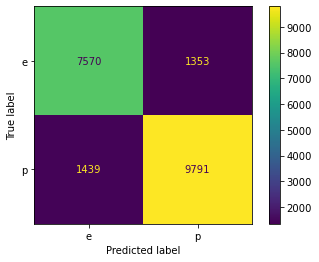

In [14]:
plot_confusion_matrix(model_pipe1, X_test, y_test)

In [15]:
model_pipe2 = Pipeline([('preprocess', ct),('knn', KNeighborsClassifier())])
model_pipe2.fit(X_train, y_train)
print('train score: {}'.format(model_pipe2.score(X_train,y_train)))
print('test score: {}'.format(model_pipe2.score(X_test,y_test)))
model_pipe2

train score: 1.0
test score: 1.0


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


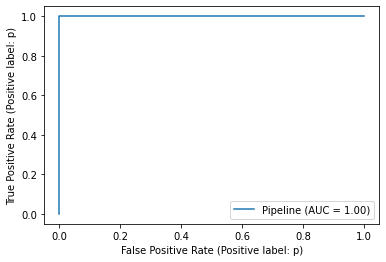

In [16]:
plot_roc_curve(model_pipe2, X_test, y_test)

C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


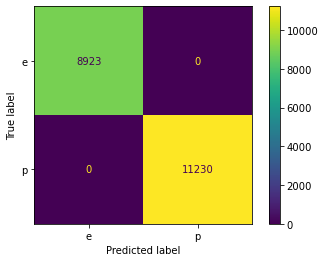

In [17]:
plot_confusion_matrix(model_pipe2, X_test, y_test)
# eliminating this and any future false negatives needs to be top priority

In [18]:
# Allow it to run the full default hyperparameters on a decision tree model
tree_clf = DecisionTreeClassifier(max_depth=50,random_state=42)

model_pipe3 = Pipeline([('preprocess', ct), ('d_tree', tree_clf)])
model_pipe3.fit(X_train, y_train)

Training: 1.0
Testing: 0.9991068327296184


In [36]:
# Accuracy on training data & test data
print('Training:', model_pipe3.score(X_train, y_train))
print('Testing:', model_pipe3.score(X_test, y_test))

Training: 1.0
Testing: 0.9991068327296184


In [19]:
feature_used = X.columns

for fi, feature in zip(tree_clf.feature_importances_, feature_used):
    print(fi, feature)

0.02570941158337451 cap-diameter
0.00599788495097894 cap-shape
0.0 cap-surface
0.0 cap-color
0.008628006268435353 does-bruise-or-bleed
0.003193062663456521 gill-attachment
0.017461500106586 gill-spacing
0.03477158658856126 gill-color
0.001883970676030327 stem-height
0.001353796326948678 stem-width
0.0 stem-root
0.020690779071220744 stem-surface
0.022442689532091584 stem-color
0.01611672340159446 veil-type
9.845341242180672e-05 veil-color
0.00048726043964125764 has-ring
0.020956721160496548 ring-type
9.739376880705787e-05 spore-print-color
0.0003544228701780389 habitat
0.0003897786720328545 season


In [20]:
f, ax = plt.subplots(figsize=(250, 250))
plot_tree(tree_clf, ax=ax);

In [21]:
# start timer
starttime = time.time()
print('Start timer')

# hyperparameter tuning
pipe_grid = {'preprocess__numpipe__numimputer__strategy': ['mean', 'median', 'most_frequent'],
             'knn__n_neighbors': [3, 5, 7],
             'knn__p': [1, 2]}

# note: default scoring is accuracy
gs_pipe = GridSearchCV(estimator=model_pipe2, 
                       param_grid=pipe_grid)

gs_pipe.fit(X_train, y_train)
print('train score: {}'.format(gs_pipe.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe.score(X_test,y_test)))

# end timer
endtime = time.time()

# display time elapsed
converttime = time.strftime("%H:%M:%S", time.gmtime(endtime - starttime))
print('Time elapsed: {}'.format(converttime))

Start timer
train score: 1.0
test score: 1.0
Time elapsed: 00:24:17


In [22]:
print(y_test)

11541    e
35700    p
55781    e
29303    p
46601    e
        ..
60825    p
58168    p
44085    e
14065    p
14806    e
Name: class, Length: 20153, dtype: object


In [23]:
best_model1 = gs_pipe.best_estimator_
y_pred2 = best_model1.predict(X_test)


In [41]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      8923
           p       1.00      1.00      1.00     11230

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153



In [37]:
#print('train score: {}'.format(best_model1.score(X_train,y_train)))
#print('test score: {}'.format(best_model1.score(y_test,y_pred2)))

train score: 1.0


ValueError: X does not contain any features, but ColumnTransformer is expecting 20 features

In [24]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      8923
           p       1.00      1.00      1.00     11230

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153



In [25]:
# use this score instead of the other one in the cell above for this model.
print('train score: {}'.format(gs_pipe.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe.score(X_test,y_test)))

train score: 1.0
test score: 1.0


In [26]:
gs_pipe.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('knn', KNeighborsClassifier(p=1))])

In [29]:
gs_pipe2.best_params_

{'knn__n_neighbors': 1,
 'knn__p': 1,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [27]:
# start timer
starttime = time.time()
print('Start timer')

# tuning hyperparameters
pipe_grid2 = {'preprocess__numpipe__numimputer__strategy': ['mean','most_frequent'],
             'knn__n_neighbors': [1,2,3,4],
             'knn__p': [1]}

gs_pipe2 = GridSearchCV(estimator=model_pipe2, 
                       param_grid=pipe_grid2)

gs_pipe2.fit(X_train, y_train)
print('train score: {}'.format(gs_pipe2.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe2.score(X_test,y_test)))

# end timer
endtime = time.time()

# display time elapsed
converttime = time.strftime("%H:%M:%S", time.gmtime(endtime - starttime))
print('Time elapsed: {}'.format(converttime))

Start timer
train score: 1.0
test score: 1.0
Time elapsed: 00:21:11


In [28]:
best_model2 = gs_pipe2.best_estimator_
best_model2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=1, p=1))])

In [30]:
gs_pipe.best_params_

{'knn__n_neighbors': 5,
 'knn__p': 1,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [35]:
best_model2 = gs_pipe2.best_estimator_
y_pred_pipe2 = best_model2.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred_pipe2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      8923
           p       1.00      1.00      1.00     11230

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153



In [31]:
# start timer
starttime = time.time()
print('Start timer')

# Narrow down hyperparameters to make a quicker grid search
pipe_grid3 = {'preprocess__numpipe__numimputer__strategy': ['mean'],
             'knn__n_neighbors': [2,3],
             'knn__p': [1]}

gs_pipe3 = GridSearchCV(estimator=model_pipe2, 
                       param_grid=pipe_grid3)

gs_pipe3.fit(X_train, y_train)
print('train score: {}'.format(gs_pipe3.score(X_train,y_train)))
print('test score: {}'.format(gs_pipe3.score(X_test,y_test)))

# end timer
endtime = time.time()

# display time elapsed
converttime = time.strftime("%H:%M:%S", time.gmtime(endtime - starttime))
print('Time elapsed: {}'.format(converttime))

Start timer
train score: 1.0
test score: 1.0
Time elapsed: 00:07:30


In [32]:
gs_pipe3.best_params_

{'knn__n_neighbors': 2,
 'knn__p': 1,
 'preprocess__numpipe__numimputer__strategy': 'mean'}

In [39]:
best_model3 = gs_pipe3.best_estimator_
y_pred_pipe3 = best_model3.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_pipe3))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      8923
           p       1.00      1.00      1.00     11230

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153



In [40]:
#print('train score: {}'.format(best_model3.score(X_train,y_train)))
#print('test score: {}'.format(best_model3.score(y_test,y_pred_pipe3))) 
#the y pred thing is not necessary for score as it does the predictions for me under the hood!

train score: 1.0


ValueError: X does not contain any features, but ColumnTransformer is expecting 20 features

In [ ]:
# try to get feature names out ct.get_feature_names_out()
# try ct.get_feature_importance('classifier')

In [34]:
# lets make some data that contains deliberately misclassified mushrooms to make sure the model picks that up
X_test_fakes = X_test[:][:20]
X_test_fakes

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
11541          1.32         c           g         n                    f   
35700          4.41         x           h         o                    f   
55781          9.23         o         NaN         n                    f   
29303          3.16         f           w         n                    t   
46601          3.71         x           h         n                    f   
44573          8.88         p           y         w                    f   
4948           7.23         f         NaN         g                    f   
33350          9.87         x           s         y                    f   
431            6.59         x           g         n                    f   
43050          8.80         x           s         w                    t   
32052          3.78         f           k         n                    f   
50434          8.94         x           e         y                    t   
51715         17.49         p           d         o                    f   
38606          8.30         x         NaN         n                    t   
40729          3.03         x           t         n                    f   
2868          18.82         f           y         n                    f   
7729           4.82         f           l         e                    f   
19759          2.16         x           s         o                    f   
34740          1.92         b           g         o                    f   
25455          7.42         f           t         e                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
11541               a          NaN          g         4.41        1.28   
35700               a            c          n         4.18        6.21   
55781             NaN          NaN          w         4.50       20.78   
29303               d            c          y         3.13        5.61   
46601             NaN            c          n         5.85        6.52   
44573             NaN          NaN          k        19.23       19.34   
4948                s            c          u         6.22       15.54   
33350               s          NaN          p         8.85       17.94   
431                 e          NaN          w         8.58       12.09   
43050               e          NaN          g         9.01       16.55   
32052               s          NaN          p         4.15        3.11   
50434               p          NaN          o         7.64       22.47   
51715               p          NaN          n        15.52       33.65   
38606               x          NaN          n         8.07       19.40   
40729               s            c          n         5.74        9.32   
2868              NaN          NaN          w        26.40       20.21   
7729                x            d          n         6.13        5.05   
19759               d          NaN          o         2.87        5.07   
34740             NaN            c          n         6.92        3.65   
25455               x            d          w         5.95       16.59   

      stem-root stem-surface stem-color veil-type veil-color has-ring  \
11541       NaN          NaN          g       NaN        NaN        f   
35700       NaN            y          o       NaN        NaN        t   
55781       NaN          NaN          n       NaN        NaN        f   
29303       NaN          NaN          n       NaN        NaN        f   
46601       NaN            s          w       NaN          w        f   
44573       NaN          NaN          w       NaN        NaN        f   
4948        NaN          NaN          b       NaN        NaN        f   
33350       NaN            i          n       NaN        NaN        f   
431         NaN            y          w         u          w        t   
43050         s          NaN          w       NaN        NaN        t   
32052       NaN          NaN          n       NaN   

In [ ]:
# change features that have high importance in order to ensure actual change in prediction?
# look at decision tree to find value to change?
# If all else fails, look up specific mushrooms to ensure the change